# 緑本勉強会 #1

## まえおき
* 『データ解析のための統計モデリング入門』（久保拓弥）を輪読していきます
* 第１回の担当は吉澤です
* 今回は第１章と第２章をやります

## 今日やること
- 第１章、第２章 講義
- 第３章以降の担当を決める
- 次回日程を決める
- 連絡手段を決める

### 緑本の概観
<img src="pic-11.jpg" width="1600" height="1400">

### 第１章
省略

#### すこし補足：p.11, 12より引用、要約
* 観測データは自然現象のごく一部を切りとったものであり、そこに見られるパターンを要約したり、<em><font color='red'>未観測の挙動を予測する</font></em>ために統計モデルが必要である
* 「<em><font color='red'>ブラックボックスな統計解析</font></em>」が蔓延しがち
* データ解析における<em><font color='red'>作図の重要性</font></em>はいくら強調しすぎても、強調しすぎるということはありません

### 第２章
#### 確率分布と統計モデルの最尤推定

#### やること
* 種子データの概要を知る、Pythonで扱う
* Poisson分布とは何か、概観を知る
* 最尤推定法が何かを知る
* 種子データをもとに、最尤推定法を用いてPoisson分布のパラメータを推定する

### Pythonを使います

#### ライブラリインポート、データ読み込み

In [2]:
# ファイルの確認 : 提供されたデータをすべてカレントフォルダの直下に格納済みであることを確認
%ls

# inlineでプロット
%matplotlib inline

ch02_convertedData.csv  kubobook2012/           pic-11.jpg
kubo2014nicoFeb.pdf     others/                 section-01.ipynb


In [3]:
# coding: utf-8

# ライブラリのインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

# 見た目をいい感じにする
seaborn.set()

# pandasでcsvデータを読み込む
sheeds = pd.read_csv('ch02_convertedData.csv', index_col='no');

#### データの確認

In [9]:
# 中身を確認する
print(len(sheeds.index)) # 行
print(len(sheeds.columns)) # 列
#sheeds #一覧

# データ型等
#sheeds.info()

# 統計量
# sheeds.describe()
# sheeds.var()  # 分散

50
1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10f6f3fd0>]], dtype=object)

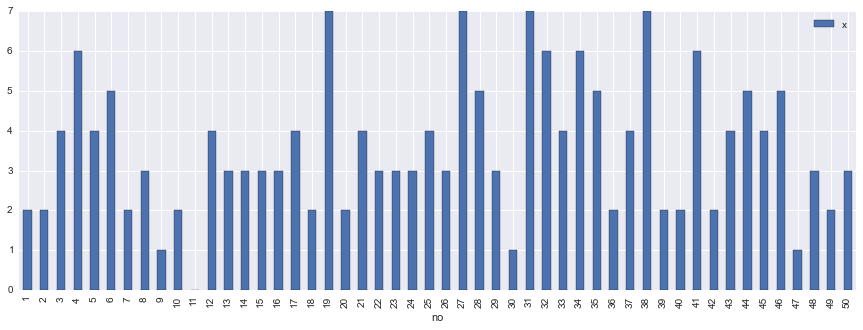

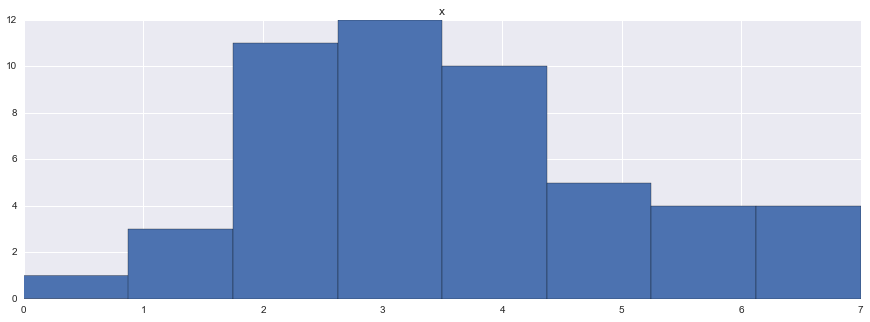

In [10]:
# 描画サイズ
plt.rcParams['figure.figsize'] = (15, 5)

# 描画
sheeds.plot(kind='bar') #折れ線
sheeds.hist(bins=8) #ヒストグラム

#### Poisson分布

##### Poisson分布を導入する理由
種子数データを統計モデルとして表現するためには、とりあえずポアソン分布(Poisson distribution)とよばれる確率分布が便利であるーーということにしておきましょう p.18

##### 特徴
- $平均\lambdaのPoisson分布の確率関数はP\left( x \right) = \frac{{\lambda ^x{e^{ - \lambda }}}}{{x!}}で表される。$
- $パラメータ \lambda (\geq 0)のみで表現できる$
- $\lambda = 平均 = 分散$

##### あらためて、Poisson分布を導入する理由
- データに含まれている値が非負の整数値（カウントデータ)
- データに下限(ゼロ)はあるみたいだけれど上限はよくわからない
- この観測データでは平均と分散がだいたい等しい

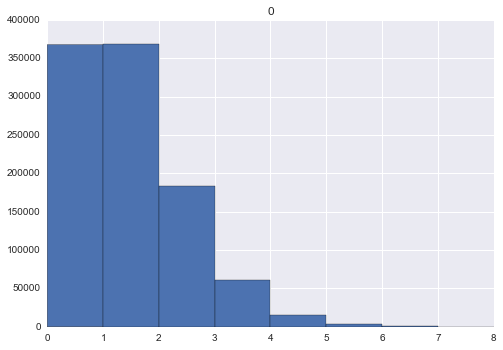

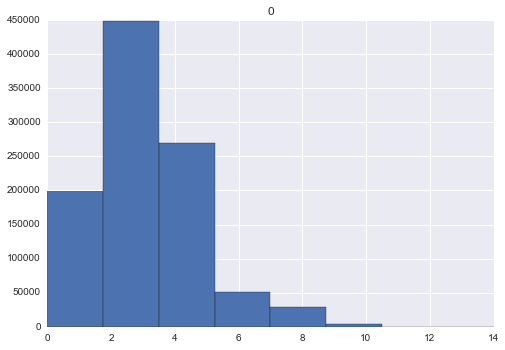

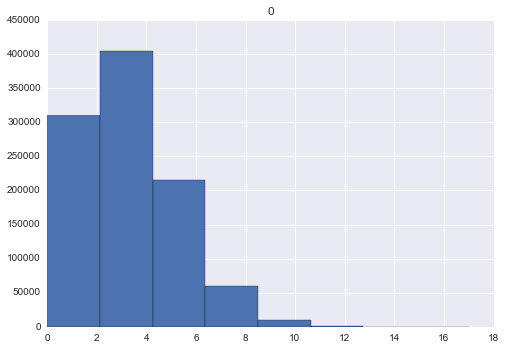

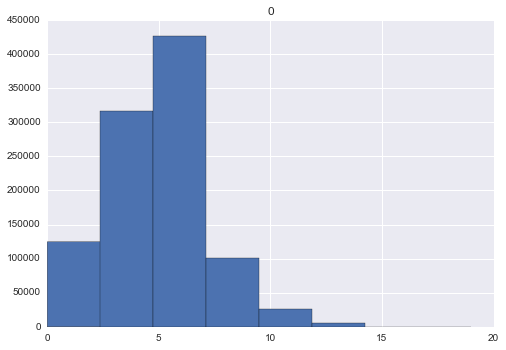

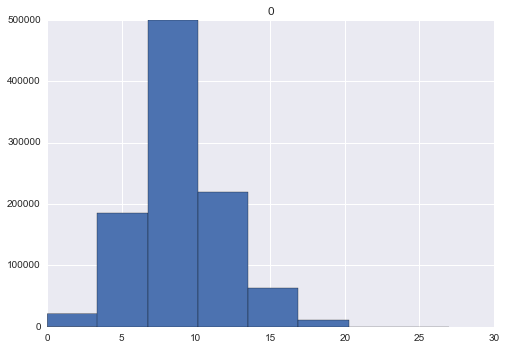

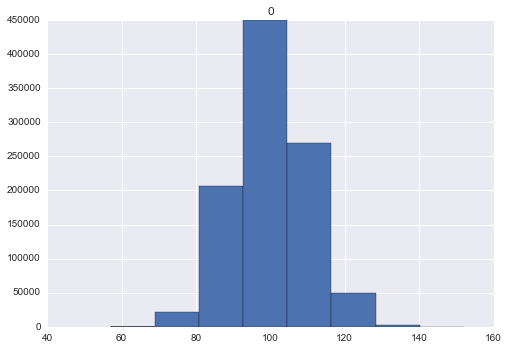

In [128]:
# poisson分布に従った変数をarrayで返す
def makeRandomPoissonValue(lmbd, numOfVariables):
    return np.random.poisson(lmbd, numOfVariables)

# 1,000,000変数を作成してプロットする
NUM_OF_VARIABLES = 1000000

# プロット上x軸の分割数
NUM_OF_BINS = 8

# パラメータlambdaを変更しつつ分布をプロット
for testedLambda in [1, 3, 3.56, 5, 9, 100]:
    pd.DataFrame(makeRandomPoissonValue(testedLambda, NUM_OF_VARIABLES)).hist(bins=NUM_OF_BINS)
    
#pd.DataFrame(makeRandomPoissonValue(1, NUM_OF_VARIABLES)).hist(bins=NUM_OF_BINS)
#pd.DataFrame(makeRandomPoissonValue(3, NUM_OF_VARIABLES)).hist(bins=NUM_OF_BINS)
#pd.DataFrame(makeRandomPoissonValue(3.56, NUM_OF_VARIABLES)).hist(bins=NUM_OF_BINS)
#pd.DataFrame(makeRandomPoissonValue(5, NUM_OF_VARIABLES)).hist(bins=NUM_OF_BINS)
#pd.DataFrame(makeRandomPoissonValue(9, NUM_OF_VARIABLES)).hist(bins=NUM_OF_BINS)
#pd.DataFrame(makeRandomPoissonValue(100, NUM_OF_VARIABLES)).hist(bins=NUM_OF_BINS)

#### パラメータを推定する

- Poisson分布でモデリングすると決めたので、Poisson分布のパラメータを推定したい
- 観測データに基づいて、**<font color='red'>最尤推定法(maximum likelihood estimation)</font>**を用いてパラメータ推定を行う
- 最尤推定法は**<font color='red'>尤度</font>**という「あてはまりの良さ」をあらわす統計量を最大にするようなパラメータを探す推定方法
- どのような確率分布を使った統計モデルにも適用できる

##### 尤度関数
$L(\lambda) = {\displaystyle \prod_{i}{P(x_{i}|\lambda)}}$

##### 日本語で説明
* パラメータ$\lambda$を決めた時に、すべての個体$x_{i}$の出現する確率の積
* すべての個体が同時に真である（同時に出現する）確率を計算し、それが最大になるようなパラメータを探したいから


##### 対数尤度関数
- でも実際は**<font color='red'>対数尤度関数(log likelihood function)</font>**を用いる
- $logL(\lambda) = {\displaystyle \sum_{i}}(y_{i}{log\lambda}-\lambda-{\displaystyle \sum_{k}^{y_{i}}{logk})}$

##### 対数尤度が最大になるパラメータを求める
- 対数尤度関数を偏微分する
- ${\displaystyle \frac{\partial logL(\lambda)}{\partial \lambda} = \sum_{i}\{\frac{y_{i}}{\lambda} - 1\} = \frac{1}{\lambda}\sum_{i}y_{i} - 50}$
- これが0になるような$\lambda$を求めると、$\lambda = 3.56$。すなわち標本平均に等しい。
- このように対数尤度あるいは尤度が最大になるパラメータを**<font color='red'>最尤推定量(maximum likelihood estimator)</font>**という
- さらに、今回のように具体的な個体の値を使って評価された値(今回は3.56)を**<font color='red'>最尤推定値(maximum likelihood estimate)</font>**とよぶ

#### 一般化

$\theta$をパラメータとする確率分布から観測データ$y_{i}$が発生した場合、その確率を$p(y|\theta)$とすると、尤度は

$\displaystyle {L(\theta | Y) = \prod_{i}p(y_{i} | \theta)}$

で、対数尤度は、

$\displaystyle {logL(\theta|Y) = \sum_{i}log{p(y_{i}|\theta)}}$

となり、最尤推定とは、この対数尤度を最大にするような$\hat{\theta}$を探し出すこと

#### 対数尤度が最大になるパラメータを強引に求めてみる

In [11]:
# Lambdaを0.01から10まで、0.01刻みで変化させて対数尤度を計算し、最尤推定量Lambdaと最大対数尤度を返す
# 1から1000まで動かし、100で除算して実装する

# ループ回数を指定
NUM_OF_LOOP = 1000

# テストするLambdaを初期化
testedLambda = 1

# 保存しておく最尤推定量を初期化
maxLambda = 0

# pandasをarrayにして計算
arraySheeds = sheeds.values.flatten()

# 結果の保存用データフレーム
resultPandasLogLikelihood = pd.DataFrame(index=[0], columns=["logLikelihood"])

# Lambdaをインクリメントしつつ評価
while testedLambda <= NUM_OF_LOOP:

    # 対数尤度を計算
    logLikelihood = 0
    for sheedIndex in range(0, len(arraySheeds)):
        
        # log(k)の和を計算
        sumLogk = 0
        for k in range(1, arraySheeds[sheedIndex]+1):
            sumLogk += np.log(k)

        # 対数尤度計算
        logLikelihood += arraySheeds[sheedIndex] * np.log(testedLambda / 100) - (testedLambda / 100) - sumLogk

    # これまでの最大値より大きいか評価して、大きいなら保存している推定量と対数尤度を更新
    if testedLambda == 1:
        maxLikelihood = logLikelihood
        maxLambda = testedLambda
    elif maxLikelihood < logLikelihood:
        maxLikelihood = logLikelihood
        maxLambda = testedLambda

    # 結果をデータフレームに保存
    temporaryPandasLogLikelihood = pd.DataFrame(index=[testedLambda], columns=["logLikelihood"])
    temporaryPandasLogLikelihood["logLikelihood"] = logLikelihood
    resultPandasLogLikelihood = pd.concat([resultPandasLogLikelihood, temporaryPandasLogLikelihood])
        
    # Lambdaをインクリメント
    testedLambda += 1

print("繰り返し終了")
print(maxLambda / 100)
print(maxLikelihood)

繰り返し終了
3.56
-97.2440029408


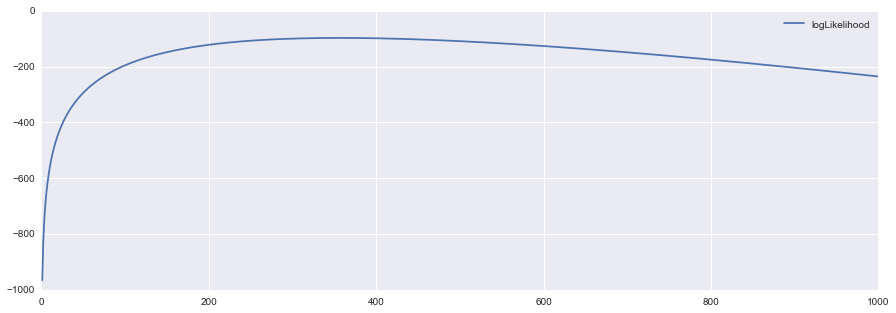

In [12]:
# 結果を保存したデータフレームを使って対数尤度をプロット
plt.rcParams['figure.figsize'] = (15, 5)
resultPandasLogLikelihood.plot()

In [13]:
# おまけ：うまくいかない例
testedLambda = 0.01

while testedLambda < 10:
    # Lambdaの値を出力
    print(testedLambda)
    
    # Lambdaをインクリメント
    testedLambda += 0.01

0.01
0.02
0.03
0.04
0.05
0.060000000000000005
0.07
0.08
0.09
0.09999999999999999
0.10999999999999999
0.11999999999999998
0.12999999999999998
0.13999999999999999
0.15
0.16
0.17
0.18000000000000002
0.19000000000000003
0.20000000000000004
0.21000000000000005
0.22000000000000006
0.23000000000000007
0.24000000000000007
0.25000000000000006
0.26000000000000006
0.2700000000000001
0.2800000000000001
0.2900000000000001
0.3000000000000001
0.3100000000000001
0.3200000000000001
0.3300000000000001
0.34000000000000014
0.35000000000000014
0.36000000000000015
0.37000000000000016
0.38000000000000017
0.3900000000000002
0.4000000000000002
0.4100000000000002
0.4200000000000002
0.4300000000000002
0.4400000000000002
0.45000000000000023
0.46000000000000024
0.47000000000000025
0.48000000000000026
0.49000000000000027
0.5000000000000002
0.5100000000000002
0.5200000000000002
0.5300000000000002
0.5400000000000003
0.5500000000000003
0.5600000000000003
0.5700000000000003
0.5800000000000003
0.5900000000000003
0.60000

参考資料
* 久保先生のWEBサイト：http://hosho.ees.hokudai.ac.jp/~kubo/ce/IwanamiBook.html
* pandas：http://pandas.pydata.org/pandas-docs/stable/api.html
* pandasを用いた基礎分析：http://blog.brainpad.co.jp/entry/2014/12/10/204111
* jupyter：https://jupyter.org/
* wakari.io：https://wakari.io/

## 次回日程　＆　担当決め
- 第3章 一般化線形モデル(GLM)
- 第４章 GLMのモデル選択
- 第5章 GLMの尤度比検定と検定の非対称性
- 第6章 GLMの応用範囲をひろげる
- 第7章 一般化線形混合モデル(GLMM)
- 第8章 マルコフ連鎖モンテカルロ(MCMC)法とベイズ統計モデル
- 第9章 GLMのベイズモデル化と事後分布の推定
- 第10章 階層ベイズモデル
- 第11章 空間構造のある階層ベイズモデル

## 資料共有
- ブログを作成( -> http://bridge-labo.weebly.com ) もしくは GitHubのリポジトリ

## 連絡手段決め

おしまい